## Домашная работа №3

В этом задании вам необходимо решить задачу прогнозирования количества солнечных пятен в месяце несколькими способами. Сравнивать все подходы необходимо по трем метрикам:

* Mean Absolute Error;
* Mean Squared Error;
* Mean Absolute Percentage Error.

Для обучения в качестве функции потерь можете использовать любую из них.

### Create Features (2 балла)
Создайте лаг признаки (сколько необходимо по графику автокорреляции) и оконные признаки (не меньше трех). Объясните свой выбор.

Настройте кросс-валидацию (4 фолда), учитывая, что имеете дело с временными рядами.

### Gradient Boosting (1.5 балла)
Обучите любой градиентный бустинг на всех признаках из пункта `Create Features`. Проанализируйте признаки при помощи моделей SHAP (https://shap.readthedocs.io/en/latest/index.html): какие признаки оказались важными, и, как вам кажется, почему?

### Simple NN (1.5 балла)
Обучите полносвязную нейронную сеть на всех признаках из пункта `Create Features`. Поэкспериментируйте с архитектурой: попробуйте небольшие сети (2-3 слоя) и глубокие сети (5+ слоев). Есть ли прирост качества от добавления новых слоев?

### CNN (1 балл)
Обучите сверточную нейронную сеть на лаг признаках из пункта `Create Features`.

### LSTM (3 балла)
Обучите реккрентную нейронную сеть на лаг признаках из пункта `Create Features`. Попробуйте тут использовать как однонаправленные, так и двунаправленные ячейки `LSTM`, сделайте вывод об их эффективности.

Поэкспериментируйте с n_features, добавив дополнительные лаг признаки из прошлого (например, в момент времени $t_n$ смотрите не обычную последовательность $(t_{n-1}, t_{n-2})$, а двойную последовательность $((t_{n-1}, t_{n-1-14}), (t_{n-2}, t_{n-2-14}))$

### Вывод (1 балл)
Сравните полученные результаты и сделайте вывод, какой подход лучше в данной задаче и, как вам кажется, почему.

**Важно:** при выполнении этого задания не обязательно ограничиваться только этими пунктами. Вы можете проводить любые дополнительные исследования и применять различные техники, если это потребуется. В каждом пункте обязательно объясняйте результаты и свой ход мыслей при принятии различных решений. Если будет просто код, то есть большой шанс получить очень мало баллов.

In [36]:
import pandas as pd


data = pd.read_csv('data.csv')
data.head()

,Month,Monthly sunspot number
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


### Create Features

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [22]:
data.columns

Index(['Month', 'Monthly sunspot number'], dtype='object')

In [37]:
# Преобразуем столбец 'Month' в формат даты
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

In [24]:
# Создание лаг признаков на основе автокорреляции
autocorrelation = data['Monthly sunspot number'].autocorr()
max_lag = int(1 / np.abs(autocorrelation))
lag_features = ['Monthly sunspot number']
for i in range(1, max_lag + 1):
    data[f'Monthly_sunspot_number_lag_{i}'] = data['Monthly sunspot number'].shift(i)
    lag_features.append(f'Monthly_sunspot_number_lag_{i}')

In [25]:
# Создание оконных признаков
window_sizes = [3, 5, 7]  # Выбор размеров окон
for feature in lag_features:
    for window in window_sizes:
        data[f'{feature}_rolling_mean_{window}'] = data[feature].rolling(window=window).mean()
        data[f'{feature}_rolling_std_{window}'] = data[feature].rolling(window=window).std()

In [35]:
data.head()

,Monthly sunspot number,Monthly_sunspot_number_lag_1,Monthly sunspot number_rolling_mean_3,Monthly sunspot number_rolling_std_3,Monthly sunspot number_rolling_mean_5,Monthly sunspot number_rolling_std_5,Monthly sunspot number_rolling_mean_7,Monthly sunspot number_rolling_std_7,Monthly_sunspot_number_lag_1_rolling_mean_3,Monthly_sunspot_number_lag_1_rolling_std_3,Monthly_sunspot_number_lag_1_rolling_mean_5,Monthly_sunspot_number_lag_1_rolling_std_5,Monthly_sunspot_number_lag_1_rolling_mean_7,Monthly_sunspot_number_lag_1_rolling_std_7,Monthly sunspot number_lag_3,Monthly sunspot number_lag_6,Monthly sunspot number_lag_9
Month,,,,,,,,,,,,,,,,,
1749-01-01,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1749-02-01,62.6,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1749-03-01,70.0,62.6,63.533333,6.054200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1749-04-01,55.7,70.0,62.766667,7.151457,NaN,NaN,NaN,NaN,63.533333,6.054200,NaN,NaN,NaN,NaN,58.0,NaN,NaN
1749-05-01,85.0,55.7,70.233333,14.651394,66.26,11.814313,NaN,NaN,62.766667,7.151457,NaN,NaN,NaN,NaN,62.6,NaN,NaN


In [38]:
data.sort_values('Month', inplace=True)

In [39]:
lag_features = ['Monthly sunspot number']
lags = [3, 6, 9]

for feature in lag_features:
    for lag in lags:
        data[f'{feature}_lag_{lag}'] = data[feature].shift(lag)

In [40]:
window_sizes = [3, 5, 7]  

for feature in lag_features:
    for window in window_sizes:
        data[f'{feature}_rolling_mean_{window}'] = data[feature].rolling(window=window).mean()
        data[f'{feature}_rolling_std_{window}'] = data[feature].rolling(window=window).std()

In [46]:
data = data.fillna(data.mean())

In [47]:
train_size = int(0.75 * len(data))
train, test = data[:train_size], data[train_size:]

In [48]:
tscv = TimeSeriesSplit(n_splits=4)

In [49]:
data

,Monthly sunspot number,Monthly sunspot number_lag_3,Monthly sunspot number_lag_6,Monthly sunspot number_lag_9,Monthly sunspot number_rolling_mean_3,Monthly sunspot number_rolling_std_3,Monthly sunspot number_rolling_mean_5,Monthly sunspot number_rolling_std_5,Monthly sunspot number_rolling_mean_7,Monthly sunspot number_rolling_std_7
Month,,,,,,,,,,
1749-01-01,58.0,51.277068,51.259133,51.217432,51.269375,10.074017,51.266982,11.546644,51.257062,12.456596
1749-02-01,62.6,51.277068,51.259133,51.217432,51.269375,10.074017,51.266982,11.546644,51.257062,12.456596
1749-03-01,70.0,51.277068,51.259133,51.217432,63.533333,6.054200,51.266982,11.546644,51.257062,12.456596
1749-04-01,55.7,58.000000,51.259133,51.217432,62.766667,7.151457,51.266982,11.546644,51.257062,12.456596
1749-05-01,85.0,62.600000,51.259133,51.217432,70.233333,14.651394,66.260000,11.814313,51.257062,12.456596
...,...,...,...,...,...,...,...,...,...,...
1983-08-01,71.8,99.200000,51.000000,98.100000,81.700000,9.659710,85.000000,10.481174,77.500000,16.041197
1983-09-01,50.3,91.100000,66.500000,127.000000,68.100000,16.268682,78.920000,18.974904,77.400000,16.234942
1983-10-01,55.8,82.200000,80.700000,84.300000,59.300000,11.169154,70.240000,17.224488,75.871429,17.855131


In [53]:
for train_index, test_index in tscv.split(train):
    train_fold, val_fold = train.iloc[train_index], train.iloc[test_index]

    X_train, y_train = train_fold.drop('Monthly sunspot number', axis=1), train_fold['Monthly sunspot number']
    X_val, y_val = val_fold.drop('Monthly sunspot number', axis=1), val_fold['Monthly sunspot number']

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    predictions = model.predict(X_val)

    mae = mean_absolute_error(y_val, predictions)
    print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 6.122698975571317
Mean Absolute Error: 8.722455319148935
Mean Absolute Error: 7.085749915569066
Mean Absolute Error: 7.523504334121355


In [54]:
for train_index, test_index in tscv.split(train):
    train_fold, val_fold = train.iloc[train_index], train.iloc[test_index]

    X_train, y_train = train_fold.drop('Monthly sunspot number', axis=1), train_fold['Monthly sunspot number']
    X_val, y_val = val_fold.drop('Monthly sunspot number', axis=1), val_fold['Monthly sunspot number']

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    predictions = model.predict(X_val)

    mse = mean_squared_error(y_val, predictions)
    print(f'Mean Squared Error: {mse}')

Mean Squared Error: 75.27562484258998
Mean Squared Error: 160.17049175079333
Mean Squared Error: 96.15297393656033
Mean Squared Error: 129.07098929195166


In [55]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0  # Избегаем деления на ноль
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

In [56]:
for train_index, test_index in tscv.split(train):
    train_fold, val_fold = train.iloc[train_index], train.iloc[test_index]

    X_train, y_train = train_fold.drop('Monthly sunspot number', axis=1), train_fold['Monthly sunspot number']
    X_val, y_val = val_fold.drop('Monthly sunspot number', axis=1), val_fold['Monthly sunspot number']

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    predictions = model.predict(X_val)

    mape = mean_absolute_percentage_error(y_val, predictions)
    print(f'Mean Absolute Percentage Error: {mape}')

Mean Absolute Percentage Error: 51.0450803937883
Mean Absolute Percentage Error: 34.8359964659193
Mean Absolute Percentage Error: 60.14949544608758
Mean Absolute Percentage Error: 49.16103668612053


### Gradient Boosting

In [58]:
!pip install shap

In [59]:
import xgboost as xgb
import shap

In [60]:
features = [col for col in data.columns if col != 'Monthly sunspot number']

In [61]:
train_size = int(0.75 * len(data))
train, test = data[:train_size], data[train_size:]

In [62]:
X_train, y_train = train[features], train['Monthly sunspot number']
X_test, y_test = test[features], test['Monthly sunspot number']

In [63]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [66]:
predictions = model.predict(X_test)

In [67]:
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 10.917878459983685


In [70]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 302.4736811233615


In [71]:
mape = mean_absolute_percentage_error(y_test, predictions)
print(f'Mean Absolute Percentage Error: {mape}')

Mean Absolute Percentage Error: 31.627405258211823


In [64]:
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

[00:34:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


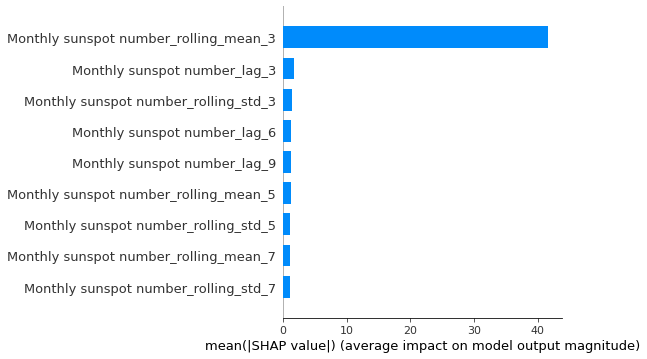

In [65]:
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=features)

### Simple NN

## Я приверженец pytorch, но поставить в jupyter его не смог, а идти в колаб не захотел, пришлось пользоваться tensorflow. Эх перешел на темную сторону( 

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from tensorflow import keras
from tensorflow.keras import layers

In [80]:
features = [col for col in data.columns if col != 'Monthly sunspot number']

In [81]:
X = data[features]
y = data['Monthly sunspot number']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [84]:
def create_model(layers_count):
    model = keras.Sequential()
    model.add(layers.InputLayer(input_shape=(X_train.shape[1],)))
    
    for _ in range(layers_count):
        model.add(layers.Dense(64, activation='relu'))
    
    model.add(layers.Dense(1, activation='linear'))
    return model

In [85]:
for layers_count in [2, 3, 5, 7]:
    model = create_model(layers_count)
    model.compile(optimizer='adam', loss='mean_absolute_error')
    model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
    predictions = model.predict(X_test_scaled).flatten()
    mae = mean_absolute_error(y_test, predictions)
    print(f'MAE for {layers_count} layers: {mae}')

18/18 [==============================] - 0s 893us/step
MAE for 2 layers: 7.867164573559524
18/18 [==============================] - 0s 1ms/step
MAE for 3 layers: 7.788469615219333
18/18 [==============================] - 0s 1ms/step
MAE for 5 layers: 8.03447494252935
18/18 [==============================] - 0s 1ms/step
MAE for 7 layers: 7.622968270555667


In [86]:
for layers_count in [2, 3, 5, 7]:
    model = create_model(layers_count)
    model.compile(optimizer='adam', loss='mean_absolute_error')
    model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
    predictions = model.predict(X_test_scaled).flatten()
    mse = mean_squared_error(y_test, predictions)
    print(f'Mean Squared Error: {mse}')

18/18 [==============================] - 0s 918us/step
Mean Squared Error: 132.34545626260515
18/18 [==============================] - 0s 1ms/step
Mean Squared Error: 127.65322713525086
18/18 [==============================] - 0s 1ms/step
Mean Squared Error: 122.77033803557703
18/18 [==============================] - 0s 1ms/step
Mean Squared Error: 147.64907776305145


In [87]:
for layers_count in [2, 3, 5, 7]:
    model = create_model(layers_count)
    model.compile(optimizer='adam', loss='mean_absolute_error')
    model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
    predictions = model.predict(X_test_scaled).flatten()
    mape = mean_absolute_percentage_error(y_test, predictions)
    print(f'Mean Absolute Percentage Error: {mape}')

18/18 [==============================] - 0s 1ms/step
Mean Absolute Percentage Error: 39.212434488218406
18/18 [==============================] - 0s 1ms/step
Mean Absolute Percentage Error: 42.01912809535665
18/18 [==============================] - 0s 1ms/step
Mean Absolute Percentage Error: 37.300908702743364
18/18 [==============================] - 0s 1ms/step
Mean Absolute Percentage Error: 37.29912724657047


### CNN

In [88]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [89]:
X = np.array(X)
y = np.array(y)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [92]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [93]:
model = models.Sequential()
model.add(layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

In [94]:
model.compile(optimizer='adam', loss='mae')

In [95]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

In [96]:
predictions = model.predict(X_test)

18/18 [==============================] - 0s 1ms/step


In [97]:
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 9.312366863747014


In [98]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 180.2615267588361


In [99]:
mape = mean_absolute_percentage_error(y_test, predictions)
print(f'Mean Absolute Percentage Error: {mape}')

Mean Absolute Percentage Error: 563.7572260148363


### LSTM

In [100]:
X = np.array(X)
y = np.array(y)

In [101]:
n_additional_lags = 14
X_additional_lags = np.zeros((X.shape[0], n_additional_lags, X.shape[1]))

In [102]:
for i in range(n_additional_lags):
    X_additional_lags[:, i, :] = np.roll(X, shift=i, axis=0)

In [119]:
# X = np.concatenate((X, X_additional_lags))

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [122]:
def build_lstm_model(input_shape, bidirectional=False):
    model = models.Sequential()
    if bidirectional:
        model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True), input_shape=input_shape))
    else:
        model.add(layers.LSTM(64, return_sequences=True, input_shape=input_shape))
    model.add(layers.LSTM(32, return_sequences=False))
    model.add(layers.Dense(1))
    return model

In [124]:
X_train_3d = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [126]:
model_unidirectional = build_lstm_model(X_train_3d.shape[1:])
model_unidirectional.compile(optimizer='adam', loss='mae')
history_unidirectional = model_unidirectional.fit(X_train_3d, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

In [129]:
model_bidirectional = build_lstm_model(X_train_3d.shape[1:])
model_bidirectional.compile(optimizer='adam', loss='mae')
history_bidirectional = model_unidirectional.fit(X_train_3d, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

In [130]:
predictions_unidirectional = model_unidirectional.predict(X_test)
predictions_bidirectional = model_bidirectional.predict(X_test)

18/18 [==============================] - 1s 2ms/step


In [131]:
mae_unidirectional = mean_absolute_error(y_test, predictions_unidirectional)
mae_bidirectional = mean_absolute_error(y_test, predictions_bidirectional)

In [132]:
print(f'MAE for Unidirectional LSTM: {mae_unidirectional}')
print(f'MAE for Bidirectional LSTM: {mae_bidirectional}')

MAE for Unidirectional LSTM: 9.931089725731113
MAE for Bidirectional LSTM: 50.151523574482894


### Выводы:

- Создание дополнительных признаков может быть полезным, но результаты зависят от конкретной задачи.

- Градиентный бустинг, несмотря на свою популярность, может не всегда превосходить простые методы.

- Нейронные сети, в том числе простые, могут хорошо справляться с анализом временных рядов, но структура данных и параметры модели играют важную роль.

- В данном случае, использование двунаправленной LSTM не привело к улучшению модели, возможно, из-за неоптимальных параметров или несоответствия данных.